## Data Exploration
Parse through 'yelp_academic_dataset_business.json' and check to see which location/cuisine combination has more restaurants.

## IMPORT PACKAGES

In [1]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import json

# from mpl_toolkits.basemap import Basemap

from pandas.io.json import json_normalize
from wordcloud import WordCloud
import squarify
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import string
import re 
import gensim 
from gensim import corpora

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.style.use('bmh')

## LOAD DATA FOR ALL BUSINESSES

In [2]:
businesses = []
with open('datasets/yelp_academic_dataset_business.json', encoding='utf8') as f:
    for line in f:
        businesses.append(json.loads(line))
        
df = json_normalize(businesses)
df.columns = df.columns.map(lambda x: x.split(".")[-1])

df

,address,attributes,AcceptsInsurance,AgesAllowed,Alcohol,Ambience,BYOB,BYOBCorkage,BestNights,BikeParking,...,Wednesday,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,...,11:0-21:0,1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB
1,,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN,False,...,NaN,0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV
2,1335 rue Beaubien E,NaN,NaN,NaN,beer_and_wine,"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,True,...,10:0-22:0,0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC
3,211 W Monroe St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,33.449999,-112.076979,Geico Insurance,,85003,8,1.5,AZ
4,2005 Alyth Place SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8:0-17:0,1,51.035591,-114.027366,Action Engine,,T2H 0N5,4,2.0,AB
5,"20235 N Cave Creek Rd, Ste 1115",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,...,5:30-20:0,1,33.671375,-112.030017,The Coffee Bean & Tea Leaf,,85024,63,4.0,AZ
6,631 Bloor St W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,43.664378,-79.414424,Bnc Cake House,Koreatown,M6G 1K8,7,4.0,ON
7,"3417 Derry Road E, Unit 103",NaN,NaN,NaN,none,NaN,NaN,NaN,NaN,NaN,...,NaN,1,43.712946,-79.632763,Thai One On,Ridgewood,L4T 1A8,7,2.0,ON
8,1440 N. Dysart Ave,NaN,NaN,NaN,none,"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,True,...,0:0-0:0,1,33.448106,-112.341302,Filiberto's Mexican Food,,85323,40,2.5,AZ
9,209 Oakland Ave,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,...,9:0-18:0,1,40.441421,-79.956457,Maggie & Stella's Gifts,Oakland,15213,3,3.5,PA


### TOP WORDS (BY BUSINESS) IN YELP DATASET

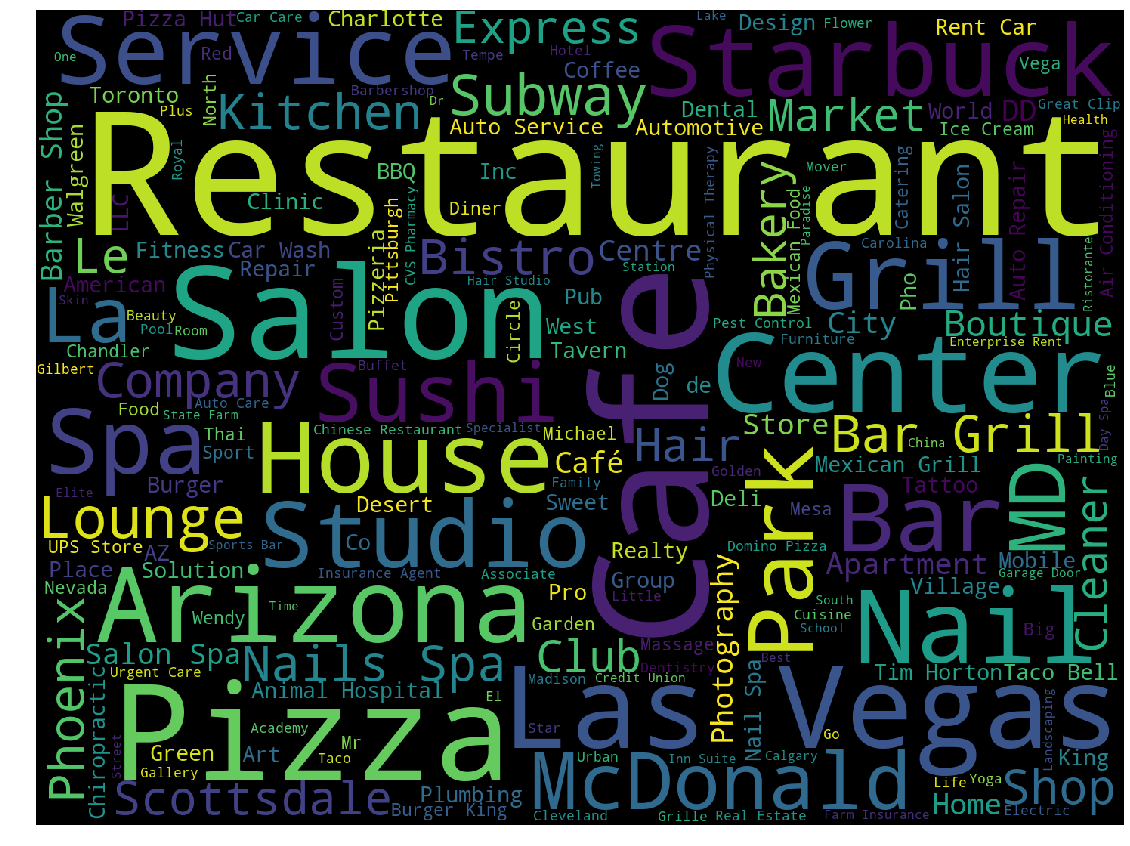

In [3]:
business = df

cloud = WordCloud(width=1440, height= 1080,max_words= 200).generate(' '.join(business['name'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off');

### TOP CITIES FOR ALL BUSINESS IN YELP

Number of city listed 1111


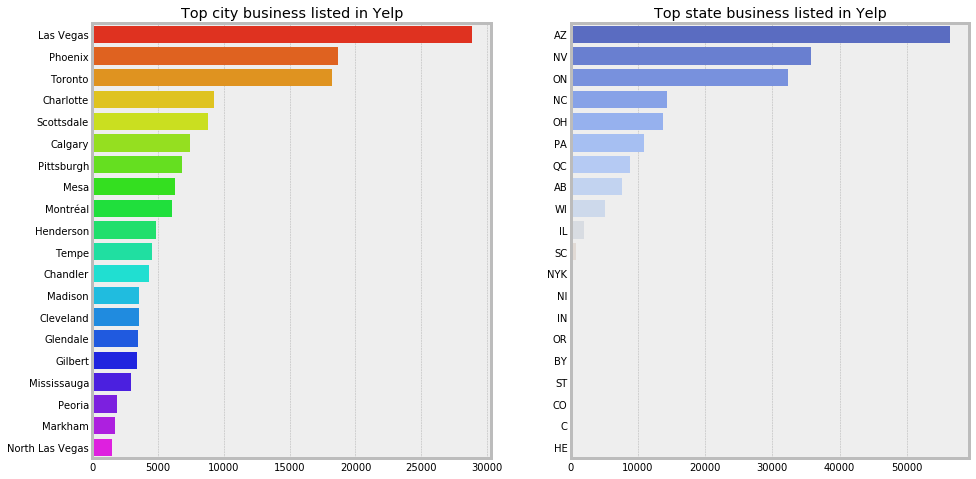

In [4]:
print('Number of city listed',business['city'].nunique())
f,ax = plt.subplots(1,2, figsize=(14,8))
ax1,ax2, = ax.flatten()
cnt = business['city'].value_counts()[:20].to_frame()

sns.barplot(cnt['city'], cnt.index, palette = 'gist_rainbow', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('Top city business listed in Yelp')

cnt = business['state'].value_counts()[:20].to_frame()

sns.barplot(cnt['state'], cnt.index, palette = 'coolwarm', ax =ax2)
ax2.set_xlabel('')
ax2.set_title('Top state business listed in Yelp');

### TOP CITIES FOR RESTAURANTS IN YELP

Number of city listed 774


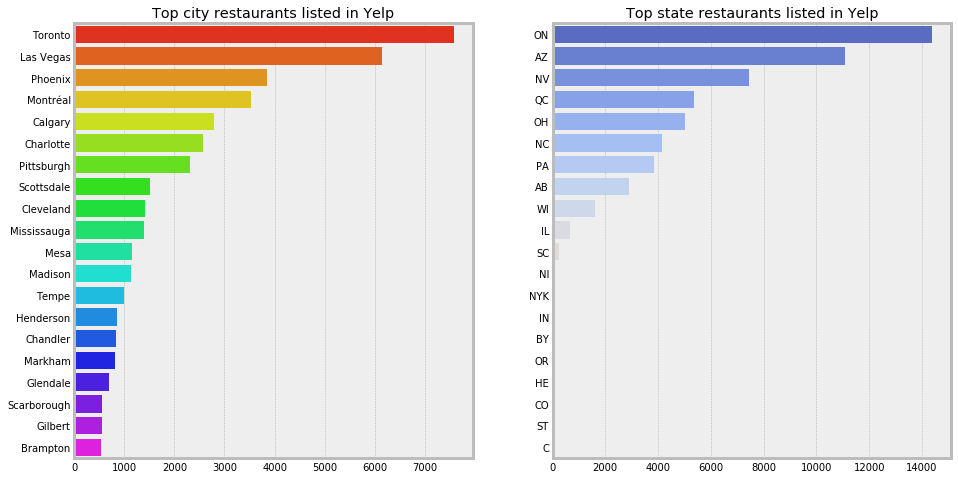

In [5]:
all_restaurants = df[df['categories'].str.contains("Restaurant") == True]

print('Number of city listed',all_restaurants['city'].nunique())
f,ax = plt.subplots(1,2, figsize=(14,8))
ax1,ax2, = ax.flatten()
cnt = all_restaurants['city'].value_counts()[:20].to_frame()

sns.barplot(cnt['city'], cnt.index, palette = 'gist_rainbow', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('Top city restaurants listed in Yelp')

cnt = all_restaurants['state'].value_counts()[:20].to_frame()

sns.barplot(cnt['state'], cnt.index, palette = 'coolwarm', ax =ax2)
ax2.set_xlabel('')
ax2.set_title('Top state restaurants listed in Yelp');

In [6]:
restaurants = df[df['categories'].str.contains("Restaurant") == True]
toronto_restaurants = restaurants[restaurants['city'] == 'Toronto']

t_italian = toronto_restaurants[toronto_restaurants['categories'].str.contains("Italian") == True]
t_pizza = toronto_restaurants[toronto_restaurants['categories'].str.contains("Pizza") == True]
t_chinese = toronto_restaurants[toronto_restaurants['categories'].str.contains("Chinese") == True]
t_indian = toronto_restaurants[toronto_restaurants['categories'].str.contains("Indian") == True]
t_steakhouses = toronto_restaurants[toronto_restaurants['categories'].str.contains("Steakhouses") == True]
t_japanese = toronto_restaurants[toronto_restaurants['categories'].str.contains("Japanese") == True]
t_mexican = toronto_restaurants[toronto_restaurants['categories'].str.contains("Mexican") == True]
t_american_new = toronto_restaurants[toronto_restaurants['categories'].str.contains("American \(New\)") == True]
t_greek = toronto_restaurants[toronto_restaurants['categories'].str.contains("Greek") == True]
t_thai = toronto_restaurants[toronto_restaurants['categories'].str.contains("Thai") == True]
t_fast_food = toronto_restaurants[toronto_restaurants['categories'].str.contains("Fast Food") == True]
t_american_trad = toronto_restaurants[toronto_restaurants['categories'].str.contains("American \(Traditional\)") == True]
t_bakeries = toronto_restaurants[toronto_restaurants['categories'].str.contains("Bakeries") == True]
t_canadian_new = toronto_restaurants[toronto_restaurants['categories'].str.contains("Canadian \(New\)") == True]
t_sandwiches = toronto_restaurants[toronto_restaurants['categories'].str.contains("Sandiwiches") == True]
t_asian_fusion = toronto_restaurants[toronto_restaurants['categories'].str.contains("Asian Fusion") == True]

In [7]:
vegas_restaurants = restaurants[restaurants['city'] == 'Las Vegas']

v_italian = vegas_restaurants[vegas_restaurants['categories'].str.contains("Italian") == True]
v_pizza = vegas_restaurants[vegas_restaurants['categories'].str.contains("Pizza") == True]
v_chinese = vegas_restaurants[vegas_restaurants['categories'].str.contains("Chinese") == True]
v_indian = vegas_restaurants[vegas_restaurants['categories'].str.contains("Indian") == True]
v_steakhouses = vegas_restaurants[vegas_restaurants['categories'].str.contains("Steakhouses") == True]
v_japanese = vegas_restaurants[vegas_restaurants['categories'].str.contains("Japanese") == True]
v_mexican = vegas_restaurants[vegas_restaurants['categories'].str.contains("Mexican") == True]
v_american_new = vegas_restaurants[vegas_restaurants['categories'].str.contains("American \(New\)") == True]
v_greek = vegas_restaurants[vegas_restaurants['categories'].str.contains("Greek") == True]
v_thai = vegas_restaurants[vegas_restaurants['categories'].str.contains("Thai") == True]
v_fast_food = vegas_restaurants[vegas_restaurants['categories'].str.contains("Fast Food") == True]
v_american_trad = vegas_restaurants[vegas_restaurants['categories'].str.contains("American \(Traditional\)") == True]
v_bakeries = vegas_restaurants[vegas_restaurants['categories'].str.contains("Bakeries") == True]
v_canadian_new = vegas_restaurants[vegas_restaurants['categories'].str.contains("Canadian \(New\)") == True]
v_sandwiches = vegas_restaurants[vegas_restaurants['categories'].str.contains("Sandiwiches") == True]
v_asian_fusion = vegas_restaurants[vegas_restaurants['categories'].str.contains("Asian Fusion") == True]

In [8]:
t_italian['cuisine'] = str("italian")
t_pizza['cuisine'] = str("pizza")
t_chinese['cuisine'] = str("chinese")
t_indian['cuisine'] = str("indian")
t_steakhouses['cuisine'] = str("steakhouses")
t_japanese['cuisine'] = str("japanese")
t_mexican['cuisine'] = str("mexican")
t_american_new['cuisine'] = str("american")
t_greek['cuisine'] = str("greek")
t_thai['cuisine'] = str("thai")
t_fast_food['cuisine'] = str("fast_food")
t_american_trad['cuisine'] = str("american")
t_bakeries['cuisine'] = str("bakeries")
t_canadian_new['cuisine'] = str("canadian")
t_sandwiches['cuisine'] = str("sandwiches")
t_asian_fusion['cuisine'] = str("asian_fusion")

t_restaurants = t_italian.append([t_pizza, t_chinese, t_indian, t_steakhouses, t_japanese, t_mexican, 
                                  t_american_new, t_greek, t_thai, t_fast_food, t_american_trad, 
                                  t_bakeries, t_canadian_new, t_sandwiches, t_asian_fusion])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [9]:
v_italian['cuisine'] = str("italian")
v_pizza['cuisine'] = str("pizza")
v_chinese['cuisine'] = str("chinese")
v_indian['cuisine'] = str("indian")
v_steakhouses['cuisine'] = str("steakhouses")
v_japanese['cuisine'] = str("japanese")
v_mexican['cuisine'] = str("mexican")
v_american_new['cuisine'] = str("american")
v_greek['cuisine'] = str("greek")
v_thai['cuisine'] = str("thai")
v_fast_food['cuisine'] = str("fast_food")
v_american_trad['cuisine'] = str("american")
v_bakeries['cuisine'] = str("bakeries")
v_canadian_new['cuisine'] = str("canadian")
v_sandwiches['cuisine'] = str("sandwiches")
v_asian_fusion['cuisine'] = str("asian_fusion")

v_restaurants = v_italian.append([v_pizza, v_chinese, v_indian, v_steakhouses, v_japanese, 
                                  v_mexican, v_american_new, v_greek, v_thai, v_fast_food,
                                  v_american_trad, v_bakeries, v_canadian_new, v_sandwiches, 
                                  v_asian_fusion])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

### COMPARE CUISINE RANK BETWEEN TORONTO & LAS VEGAS RESTAURANTS

Text(0.5, 1.0, 'Cuisine Ranked for Las Vegas')

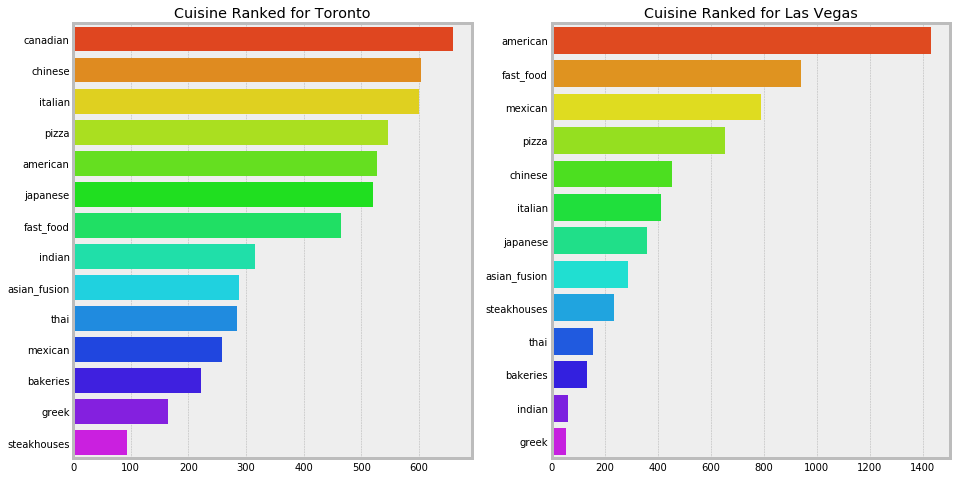

In [10]:
f,ax = plt.subplots(1,2, figsize=(14,8))
ax1,ax2,  = ax.flatten()
cnt = t_restaurants['cuisine'].value_counts()[:20].to_frame()

sns.barplot(cnt['cuisine'], cnt.index, palette = 'gist_rainbow', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('Cuisine Ranked for Toronto')


cnt = v_restaurants['cuisine'].value_counts()[:20].to_frame()

sns.barplot(cnt['cuisine'], cnt.index, palette = 'gist_rainbow', ax =ax2)
ax2.set_xlabel('')
ax2.set_title('Cuisine Ranked for Las Vegas')


##### Top cuisine in Toronto is Canadian, at 659 restaurants, while in Las Vegas, Fast Food type restaurant is top with 930 businesses. However, if we combine both American (Trad & New), we'll have a total of 1259 businesses.

In [11]:
def basic_details(df):
    print('Row:{}, columns:{}'.format(df.shape[0],df.shape[1]))
    k = pd.DataFrame()
    k['number of Unique value'] = df.nunique()
    k['Number of missing value'] = df.isnull().sum()
    k['Data type'] = df.dtypes
    return k

### ALL RESTAURANTS

In [12]:
basic_details(all_restaurants)

Row:57191, columns:61


,number of Unique value,Number of missing value,Data type
address,46702,0,object
attributes,0,57191,float64
AcceptsInsurance,2,57175,object
AgesAllowed,4,57121,object
Alcohol,3,13405,object
Ambience,164,12751,object
BYOB,2,56281,object
BYOBCorkage,3,55782,object
BestNights,64,52775,object
BikeParking,2,19033,object


### LAS VEGAS RESTAURANTS

In [13]:
basic_details(vegas_restaurants)

Row:6153, columns:61


,number of Unique value,Number of missing value,Data type
address,4316,0,object
attributes,0,6153,float64
AcceptsInsurance,2,6150,object
AgesAllowed,2,6138,object
Alcohol,3,964,object
Ambience,65,998,object
BYOB,2,5934,object
BYOBCorkage,3,5825,object
BestNights,52,5579,object
BikeParking,2,1614,object


### TORONTO RESTATURANTS

In [14]:
basic_details(toronto_restaurants)

Row:7578, columns:61


,number of Unique value,Number of missing value,Data type
address,6076,0,object
attributes,0,7578,float64
AcceptsInsurance,1,7577,object
AgesAllowed,2,7570,object
Alcohol,3,1840,object
Ambience,54,1731,object
BYOB,0,7578,object
BYOBCorkage,0,7578,object
BestNights,52,7052,object
BikeParking,2,2600,object


### Distribution of rating (ALL B)
Let look at distribution of rating given by the user for different business.

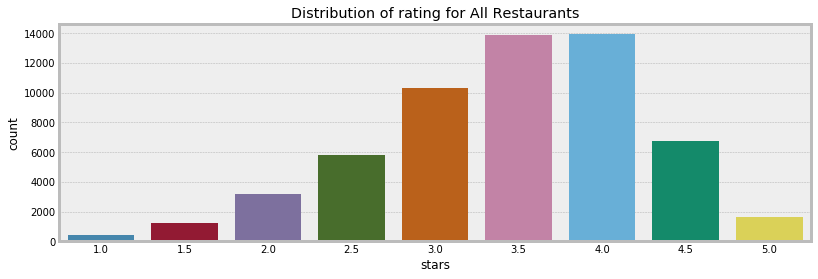

In [15]:
plt.figure(figsize=(12,4))
ax = sns.countplot(all_restaurants['stars'])
plt.title('Distribution of rating for All Restaurants');

most gives ratings between 3.5 to 4.0

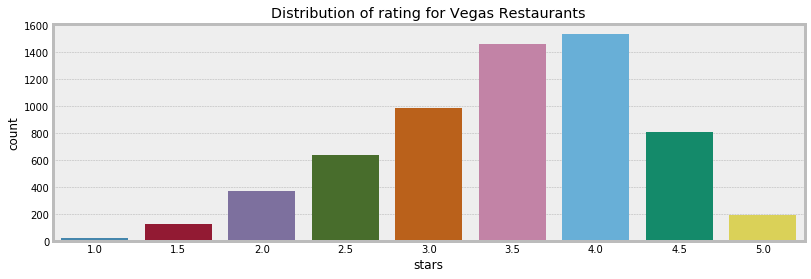

In [16]:
plt.figure(figsize=(12,4))
ax = sns.countplot(vegas_restaurants['stars'])
plt.title('Distribution of rating for Vegas Restaurants');

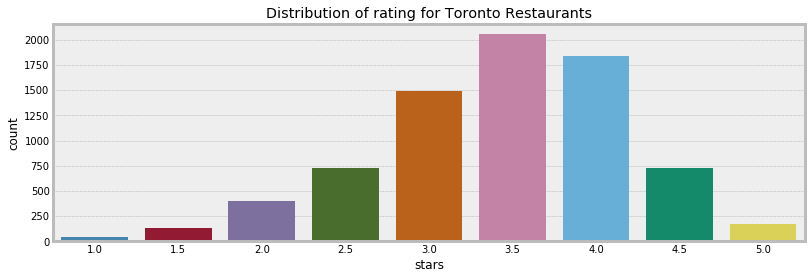

In [17]:
plt.figure(figsize=(12,4))
ax = sns.countplot(toronto_restaurants['stars'])
plt.title('Distribution of rating for Toronto Restaurants');

### REVIEW COUNT FOR VEGAS RESTAURANTS

Median review count 50.0


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


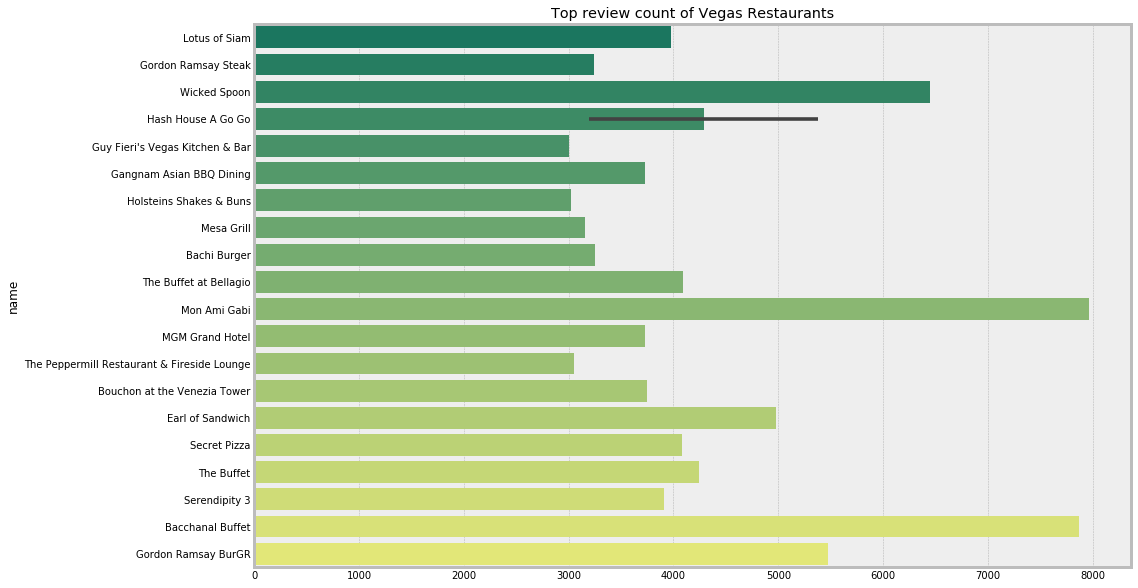

In [18]:
print('Median review count',vegas_restaurants['review_count'].median())
plt.figure(figsize = (14,10))
sns.barplot(vegas_restaurants[vegas_restaurants['review_count'] >3000]['review_count'],vegas_restaurants[vegas_restaurants['review_count'] >3000]['name'],
           palette = 'summer')
plt.xlabel('')
plt.title('Top review count of Vegas Restaurants');

### REVIEW COUNT FOR TORONTO RESTAURANTS

Median review count 18.0


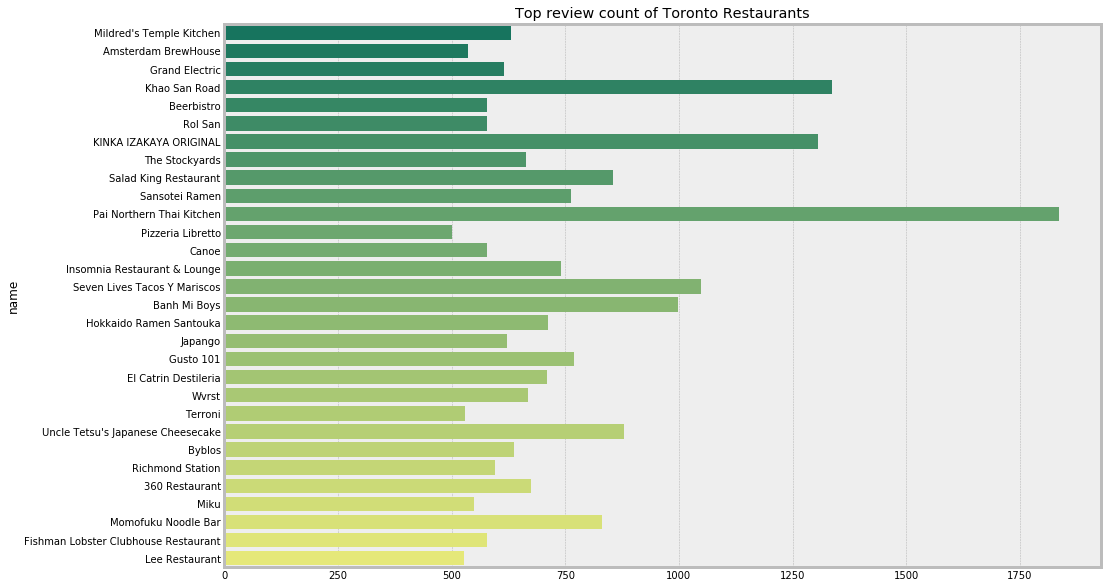

In [19]:
print('Median review count',toronto_restaurants['review_count'].median())
plt.figure(figsize = (14,10))
sns.barplot(toronto_restaurants[toronto_restaurants['review_count'] >500]['review_count'],
            toronto_restaurants[toronto_restaurants['review_count'] >500]['name'],
           palette = 'summer')
plt.xlabel('')
plt.title('Top review count of Toronto Restaurants');

### REVIEW COUNT FOR AMERICAN CUISINE RESTAURANTS IN VEGAS

In [20]:
len(amer_rest)

NameError: name 'amer_rest' is not defined

In [ ]:
amer_rest = v_american_new.append(v_american_trad)

amer_rest = amer_rest[~amer_rest.index.duplicated(keep='first')]

print('Median review count',amer_rest['review_count'].median())
plt.figure(figsize = (14,10))
sns.barplot(amer_rest[amer_rest['review_count'] >2500]['review_count'],amer_rest[amer_rest['review_count'] >2500]['name'],
           palette = 'summer')
plt.xlabel('')
plt.title('Top review count of American Cuisine Restaurants in Vegas');

In [ ]:
a = ps.sqldf('''select name from amer_rest order by review_count desc limit 10''', locals())
a.head()

### REVIEW COUNT FOR CANADIAN CUISINE RESTAURANTS IN TORONTO

In [ ]:
can_rest = toronto_restaurants[toronto_restaurants['categories'].str.contains("Canadian \(New\)") == True]


print('Median review count',can_rest['review_count'].median())
plt.figure(figsize = (14,10))
sns.barplot(can_rest[can_rest['review_count'] >300]['review_count'],can_rest[can_rest['review_count'] >300]['name'],
           palette = 'summer')
plt.xlabel('')
plt.title('Top review count of Canadian Cuisine Restaurants');

### REVIEW COUNT BY RATINGS

In [ ]:
plt.figure(figsize=(12,4))
ax = sns.countplot(amer_rest['stars'])
plt.title('Distribution of rating for American Cusine in Las Vegas');

In [ ]:
q = """SELECT count(distinct business_id) as no_of_restaurants, stars FROM 
        (select business_id,
        case 
            when stars < 3.5 then 'low'
            when stars = 3.5 then 'med'
            else 'high'
        end as stars
        from amer_rest)
        group by stars """

a = ps.sqldf(q, locals())

a.head()

In [ ]:
plt.figure(figsize=(12,4))
ax = sns.countplot(can_rest['stars'])
plt.title('Distribution of rating for Canadian Cusine in Toronto');

In [ ]:
q1 = """SELECT count(distinct business_id) as no_of_restaurants, stars FROM 
        (select business_id,
        case 
            when stars < 3.5 then 'low'
            when stars = 3.5 then 'med'
            else 'high'
        end as stars
        from can_rest)
        group by stars """

a = ps.sqldf(q1, locals())

a.head()

## CONCLUSION

#### Based on the data exploration done here, it is found that we could get more restaurant datasets if we specify on American Cuisine in Las Vegas.

#### Furthermore, the top restaurant with most reviews for American Cuisine in Vegas is nearly 10 times more than the top restaurant with most reviews for Canadian Cuisine in Toronto.

#### Restaurants with most reviews within the 'American Cuisine in Vegas' dataset is Gordon Ramsay BurGR.

In [ ]:
# vegas_restaurants.to_csv("vegas_rest.csv", sep='\t', encoding='utf-8')
# amer_rest.to_csv("american_restaurants.csv", sep='\t', encoding='utf-8')